In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#results = session.query(Measurement, Measurement.date).order_by(Measurement.date.desc()).limit(365).all()
#for row in results:
 #   print(row.date)

('2017-08-23',)


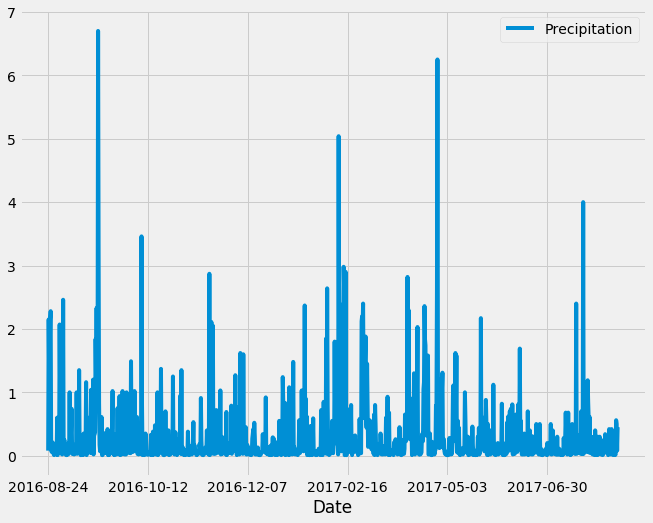

In [11]:
### Design a query to retrieve the last 12 months of precipitation data and plot the results ###

# Calculate the date 1 year ago from the last data point in the database
last_data_point = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_data_point)
previous_year = dt.date(2017,8,23)-dt.timedelta(days=365)
previous_year
# Perform a query to retrieve the data and precipitation scores

result = session.query(Measurement).filter(Measurement.prcp).filter(Measurement.date > '2016-08-23').all()

date = []
prcp = []

for record in result:
    date.append(record.date)
    prcp.append(record.prcp)
    
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame({'Date':date,
                  'Precipitation':prcp})
df.set_index('Date',inplace=True)

# Sort the dataframe by date
df.sort_values(by=['Date'],inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(figsize=(10,8))
plt.show()

In [12]:
df.reset_index(drop=False, inplace=True)

In [13]:
# Convert column 'Date' to date type
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [14]:
#Add column "month" to then group data by preciptation 
#df['Month'] = df['Date'].dt.strftime('%m') 
df['Day'] = df['Date'].dt.strftime('%d')

In [15]:
## Use Pandas to calcualte the summary statistics for the precipitation data
#stats = df.groupby("Month")["Precipitation"].aggregate(['mean','median','var','std','sem'])
#stats

stats = df.groupby("Day")["Precipitation"].aggregate(['mean','median','var','std','sem'])
stats


,mean,median,var,std,sem
Day,,,,,
01,0.397442,0.120,0.419129,0.647402,0.098728
02,0.324571,0.090,0.234937,0.484703,0.081930
03,0.231538,0.130,0.102061,0.319469,0.051156
04,0.277778,0.080,0.447710,0.669112,0.128771
05,0.248182,0.110,0.097028,0.311493,0.054224
06,0.134800,0.050,0.053001,0.230219,0.046044
07,0.382500,0.115,0.313160,0.559607,0.105756
08,0.206061,0.070,0.098262,0.313468,0.054568
09,0.344000,0.230,0.164625,0.405740,0.074078


In [16]:
# Design a query to show how many stations are available in this dataset?
count_stations = session.query(Station).group_by(Station.station).count()
count_stations

9

In [17]:
## What are the most active stations? (i.e. what stations have the most rows)?##

# List the stations and the observation counts in descending order.
station_list = session.query(Measurement).order_by(Measurement.tobs.desc()).statement

df= pd.read_sql_query(station_list, session.bind)
df.head(10)
df

,id,station,date,prcp,tobs
0,213,USC00519397,2010-08-23,0.01,87.0
1,2636,USC00519397,2017-05-23,0.08,87.0
2,8991,USC00517948,2017-07-03,NaN,87.0
3,15210,USC00511918,2010-09-19,0.00,87.0
4,15588,USC00511918,2011-10-08,0.00,86.0
...,...,...,...,...,...
19545,15711,USC00511918,2012-02-10,0.00,56.0
19546,16753,USC00511918,2015-01-05,0.00,56.0
19547,16124,USC00511918,2013-04-03,0.00,55.0
19548,13294,USC00519281,2013-01-16,0.02,54.0


In [21]:
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [35]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
              filter(Measurement.station == "USC00519281").all()

[(54.0, 85.0, 71.66378066378067)]

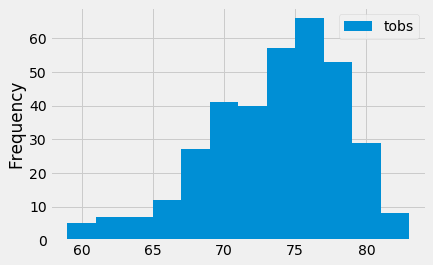

In [28]:
# Choose the station with the highest number of temperature observations.

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281").\
        filter(Measurement.date >= previous_year).all()

# Create a dataframe (not a tuple), then a plot of the results 
df = pd.DataFrame(results, columns = ["tobs"])
df.plot.hist(bins=12)

## Bonus Challenge Assignment

In [29]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [32]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
year_start = dt.date(2018,1,1)-dt.timedelta(days=365)
year_end = dt.date(2018,1,7)-dt.timedelta(days=365)

tmin, tavg, tmax = calc_temps(year_start, year_end)[0]
print(tmin, tavg, tmax)

62.0 68.36585365853658 74.0


In [34]:
results=calc_temps(year_start, year_end)
print(results)

[(62.0, 68.36585365853658, 74.0)]


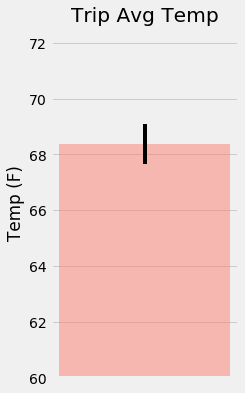

In [38]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
lower = results[0][1] - results[0][0]
upper = results[0][2] - results[0][1]

plt.figure(figsize=(3,6))
plt.bar(0, results[0][1], yerr=[upper-lower], color='salmon', alpha=0.5)
plt.title('Trip Avg Temp')
plt.xticks([])
plt.ylabel('Temp (F)')
plt.ylim(60)

plt.show()

In [40]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
def rainfall(start_date, end_date):
    return session.query(Measurement.station,
                         Station.name,
                         Measurement.prcp.label('rainfall'),
                         Station.latitude,
                         Station.longitude,
                         Station.elevation).\
                            group_by(Measurement.station).\
                            join(Station, Measurement.station == Station.station).\
                            filter(Measurement.date >= start_date).\
                            filter(Measurement.date <= end_date).\
                            order_by('rainfall desc').all()

rainfall('2017-01-01', '2018-01-01')


CompileError: Can't resolve label reference for ORDER BY / GROUP BY / DISTINCT etc. Textual SQL expression 'rainfall desc' should be explicitly declared as text('rainfall desc')

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
